# Tree ensembles

<div style="text-align: right"><a>por </a><a href="https://www.linkedin.com/in/sheriff-data/" target="_blank">Manuel López Sheriff</a></div>

In [ ]:
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV

Los modelos ensemble en ML son aquellos que:

 * utilizan varios *weak learners* para
 * construir un modelo promedio que en general se comporta mejor que cada uno de sus componentes individuales

## Bagging

Bagging (Bootstrap Aggregation) es una herramienta de Machine Learning utilizada para:

 * mejorar la estabilidad de un algoritmo (robusto ante pequeños cambios en los datos)
 * reducir el overfitting

 

Consiste en, dado un conjunto de datos original $D$:
 1. construir diferentes conjuntos de datos $D_i$ a partir de $D$, extrayendo muestras con reemplazo (bootstraping)
 2. construir un modelo para cada conjunto de datos $D_i$
 3. para finalmente promediar las predicciones en la fase de testing (agregación)

<img width=600 src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c8/Ensemble_Bagging.svg/440px-Ensemble_Bagging.svg.png">

## Random Forest

Random Forest aplica la lógica Bagging para construir varios árboles de decisión

<img width=600 src="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/02/rfc_vs_dt1.png">

## Ejercicio

Entrena un RandomForestRegressor sobre wine_quality

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("./datasets/wine_quality.csv")

In [3]:
df.shape

(4898, 12)

### Train test split

In [5]:
target = "quality"

In [6]:
X = df.drop(target, axis=1)
y = df[target]

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

#### Regresión lineal

In [9]:
from sklearn.linear_model import LinearRegression

In [11]:
lin = LinearRegression()

In [12]:
lin.fit(X_train, y_train)

LinearRegression()

In [13]:
lin_test_score = mean_squared_error(
    y_pred=lin.predict(X_test),
    y_true=y_test,
)

In [14]:
print(f"The test score with linear regression is {lin_test_score.round(3)}")

The test score with linear regression is 0.579


#### Decision tree regressor

In [16]:
from sklearn.tree import DecisionTreeRegressor

In [29]:
tree = DecisionTreeRegressor(max_depth=5, random_state=666)

In [30]:
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=666)

In [31]:
tree_test_score = mean_squared_error(
    y_pred=tree.predict(X_test),
    y_true=y_test
)

In [32]:
print(f"The test score with decision tree is {tree_test_score.round(3)}")

The test score with decision tree is 0.55


In [33]:
from sklearn.tree import plot_tree

In [34]:
import matplotlib.pyplot as plt

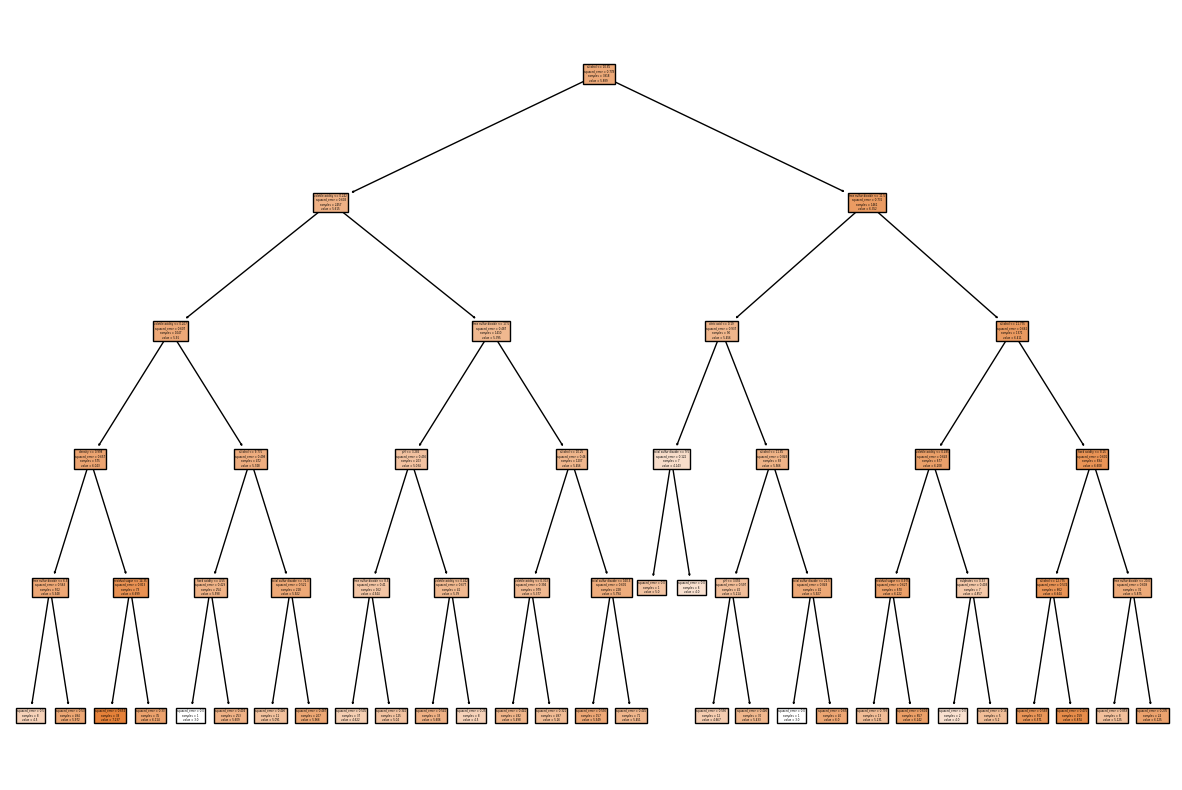

In [35]:
fig = plt.figure(figsize=(15, 10))
plot_tree(tree, feature_names=df.columns[:-1], filled=True);

In [ ]:
fig.savefig("wineee.svg")

#### Random forest classifier

In [37]:
from sklearn.ensemble import RandomForestRegressor

<img width=600 src="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/02/rfc_vs_dt1.png">

 * n_estimators: número de árboles
 * max_depth: profundidad máxima de cada árbol
 * max_features: número de variables a considerar en cada división de cada árbol

In [63]:
%%time
rf = RandomForestRegressor(n_estimators=200, max_features=0.8, max_depth=6)

CPU times: user 29 µs, sys: 4 µs, total: 33 µs
Wall time: 37.2 µs


In [48]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, max_features=0.8, n_estimators=10)

In [49]:
rf_test_score = mean_squared_error(
    y_pred=rf.predict(X_test),
    y_true=y_test
)

In [50]:
print(f"The test score with random forest is {rf_test_score.round(3)}")

The test score with random forest is 0.514


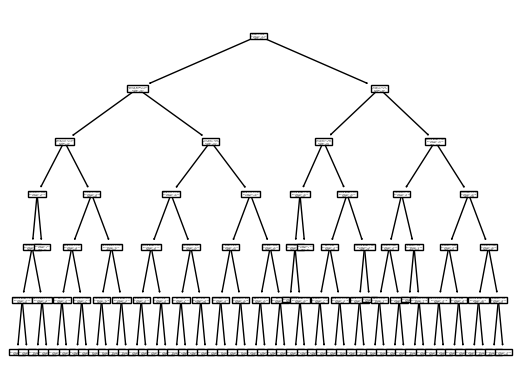

In [42]:
fig = plt.figure()

for i, tree in enumerate(rf.estimators_):
    plot_tree(tree, feature_names=X_train.columns)
    fig.savefig(f"arbol_{i}.svg")

En general, RandomForest funciona mejor que el árbol de decisión

## Boosting

Boosting es otra técnica de ensemble para crear una colección de modelos. Pero en este caso:

 * los modelos se construyen secuencialmente

 * los primeros modelos ajustan modelos sencillos a los datos

 * el modelo sucesivo tiene en cuenta los errores cometidos por el modelo anterior

<img width=600 src="https://iq.opengenus.org/content/images/2020/01/boosted-trees-process.png">

## Gradient Boosting

Gradient Boosting aplica la lógica Boosting (aparte de Bagging) para construir varios árboles de decisión

Va entrenando varios **árboles de forma consecutiva** y, en cada paso

 * pondera las muestras de datos de forma diferente
 * para centrarse en los datos más difíciles de predecir

In [52]:
from sklearn.ensemble import GradientBoostingRegressor

In [53]:
gb = GradientBoostingRegressor(n_estimators=500, max_features=1, max_depth=10)

In [55]:
%%time
gb.fit(X_train, y_train)

CPU times: user 1.49 s, sys: 848 µs, total: 1.49 s
Wall time: 1.49 s


GradientBoostingRegressor(max_depth=10, max_features=1, n_estimators=500)

In [56]:
gb_test_score = mean_squared_error(
    y_pred=gb.predict(X_test),
    y_true=y_test
)

In [57]:
print(f"The test score with gradient boosting is {gb_test_score.round(3)}")

The test score with gradient boosting is 0.378


In [58]:
n = 10

In [59]:
preds = pd.DataFrame({
    "real": y_test[:n], 
    "lin": lin.predict(X_test[:n]), 
    "tree": tree.predict(X_test[:n]), 
    "gb": gb.predict(X_test[:n])
})

/home/sheriff/teaching-env/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


In [60]:
preds.round(3)

,real,lin,tree,gb
367,6,5.248,5.222,4.988
1939,5,5.230,5.636,5.001
3475,6,5.534,5.855,6.000
4630,7,6.214,5.636,6.061
209,6,5.282,5.950,5.950
4263,6,6.077,6.799,5.924
1057,5,5.006,5.636,5.180
3053,5,5.619,6.083,5.946
2217,6,6.091,6.119,5.751
1794,5,5.105,5.636,5.316


En efecto, gradient boosting normalmente obtiene resultados mucho mejores!

Todavía podemos hacer GridSearchCV para encontrar los mejores hiperparámetros, y tal vez mejorar los resultados

## NOTA

 * Los Random Forest pueden ser entrenados de forma **paralela**: si construyes 1000 árboles, puedes hacerlo en diferentes máquinas
 * Gradient Boosting **no** puede entrenarse en paralelo: los árboles se construyen secuencialmente

## Guardar / Exportar un modelo

In [67]:
import pickle

In [68]:
# save the model to disk
pickle.dump(gb, open("gb_wine_q.pkl", 'wb'))

In [69]:
# load the model from disk
model = pickle.load(open("gb_wine_q.pkl", 'rb'))

In [70]:
model.predict(X_test)

array([4.98810003, 5.00052044, 6.00000569, 6.06103951, 5.94962834,
       5.92435412, 5.18033992, 5.94563541, 5.75059713, 5.31623582,
       4.84522416, 4.90359932, 5.4867845 , 4.99991495, 6.00004481,
       5.42945979, 5.99992759, 4.94630168, 5.42080026, 5.71238556,
       5.56626446, 4.99997411, 5.91828804, 5.56144634, 5.0001304 ,
       7.00002589, 5.61327354, 5.76466602, 5.38407878, 6.71548664,
       6.29873499, 4.95339641, 5.99963558, 5.81390477, 8.00000777,
       4.92727203, 6.08615982, 6.34810644, 6.64286543, 6.87985442,
       5.97518533, 4.93910912, 5.99996303, 5.90921134, 6.13176388,
       6.02777014, 6.00013501, 5.41040419, 5.78728816, 5.99994116,
       4.59977286, 7.00002255, 5.0001146 , 5.22960249, 5.80794555,
       6.68314233, 6.73495591, 6.53558218, 5.00018069, 5.99982439,
       4.99989376, 5.00030489, 5.65778482, 5.45644145, 6.75063785,
       6.4599226 , 5.48990585, 5.00004212, 5.61701428, 5.7108778 ,
       5.85424202, 6.99996009, 6.66455564, 5.13385111, 5.28867

Cuidao: pickle es muy version dependent

In [74]:
[k for k in dir(pickle) if "v" in k]

['_inverted_registry', 'format_version']

In [75]:
pickle.format_version

'4.0'